In [127]:
import T2T_ACE.duplication_evaluation as duplication_evaluation
from T2T_ACE.alignment_utilities import load_reference
import T2T_ACE.validator as v
import importlib

In [81]:
# Update the reference genomes to local path
class ReferenceLocations:
        hg002t2t = "/Users/gaoyueya/Documents/Reference_Genome/hg002v1.0.fasta"
        chm13 = "/Users/gaoyueya/Documents/Reference_Genome/chm13v2.0.fa.gz"
        hg38 = "/Users/gaoyueya/Documents/Reference_Genome/Homo_sapiens_assembly38.fasta"

# Load the minimap2 aligner from reference fasta file
# Load HG002 T2T reference
hg002t2t = load_reference(ReferenceLocations.hg002t2t)
# Load hg38 reference
hg38 = load_reference(ReferenceLocations.hg38)

INFO:root:Loading reference from: /Users/gaoyueya/Documents/Reference_Genome/hg002v1.0.fasta
INFO:root:Loading reference from: /Users/gaoyueya/Documents/Reference_Genome/Homo_sapiens_assembly38.fasta


In [687]:
importlib.reload(v)

<module 'T2T_ACE.validator' from '/Users/gaoyueya/Documents/GitHub/T2T-ACE/T2T_ACE/validator.py'>

In [645]:
importlib.reload(duplication_evaluation)

<module 'T2T_ACE.duplication_evaluation' from '/Users/gaoyueya/Documents/GitHub/T2T-ACE/T2T_ACE/duplication_evaluation.py'>

In [646]:
dup_interval = "chr1:16605768-16645359"
dup_eval = duplication_evaluation.eval_dup_interval(dup_interval, ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t)

In [647]:
dup_eval.classifyInterval()

input dup interval: chr1:16605768-16645359
hg38 dup count: 1
interval: chr1:16605767-16645359	strand: 1
hg2 dup count: 5
interval: chr1_MATERNAL:16887164-16926759	strand: -1
interval: chr1_MATERNAL:16556347-16595891	strand: 1
interval: chr1_PATERNAL:16899366-16938979	strand: -1
interval: chr1_PATERNAL:16376753-16416341	strand: 1
interval: chr1_PATERNAL:16716679-16756269	strand: -1


'Homozygous Duplication'

In [648]:
dup_eval.classify_bin_alignment()

input dup interval: chr1:16605768-16645359
interval size: 39592
window size: 1000, number of windows: 39
Homozygous Duplication: 88.4%
Paternal Heterozygous Duplication: 10.1%


{'Homozygous Duplication': 35, 'Paternal Heterozygous Duplication': 4}

In [649]:
dup_eval.bin_alignment()

(1000,
 ['chr1:16605768-16606768',
  'chr1:16606768-16607768',
  'chr1:16607768-16608768',
  'chr1:16608768-16609768',
  'chr1:16609768-16610768',
  'chr1:16610768-16611768',
  'chr1:16611768-16612768',
  'chr1:16612768-16613768',
  'chr1:16613768-16614768',
  'chr1:16614768-16615768',
  'chr1:16615768-16616768',
  'chr1:16616768-16617768',
  'chr1:16617768-16618768',
  'chr1:16618768-16619768',
  'chr1:16619768-16620768',
  'chr1:16620768-16621768',
  'chr1:16621768-16622768',
  'chr1:16622768-16623768',
  'chr1:16623768-16624768',
  'chr1:16624768-16625768',
  'chr1:16625768-16626768',
  'chr1:16626768-16627768',
  'chr1:16627768-16628768',
  'chr1:16628768-16629768',
  'chr1:16629768-16630768',
  'chr1:16630768-16631768',
  'chr1:16631768-16632768',
  'chr1:16632768-16633768',
  'chr1:16633768-16634768',
  'chr1:16634768-16635768',
  'chr1:16635768-16636768',
  'chr1:16636768-16637768',
  'chr1:16637768-16638768',
  'chr1:16638768-16639768',
  'chr1:16639768-16640768',
  'chr1:16640

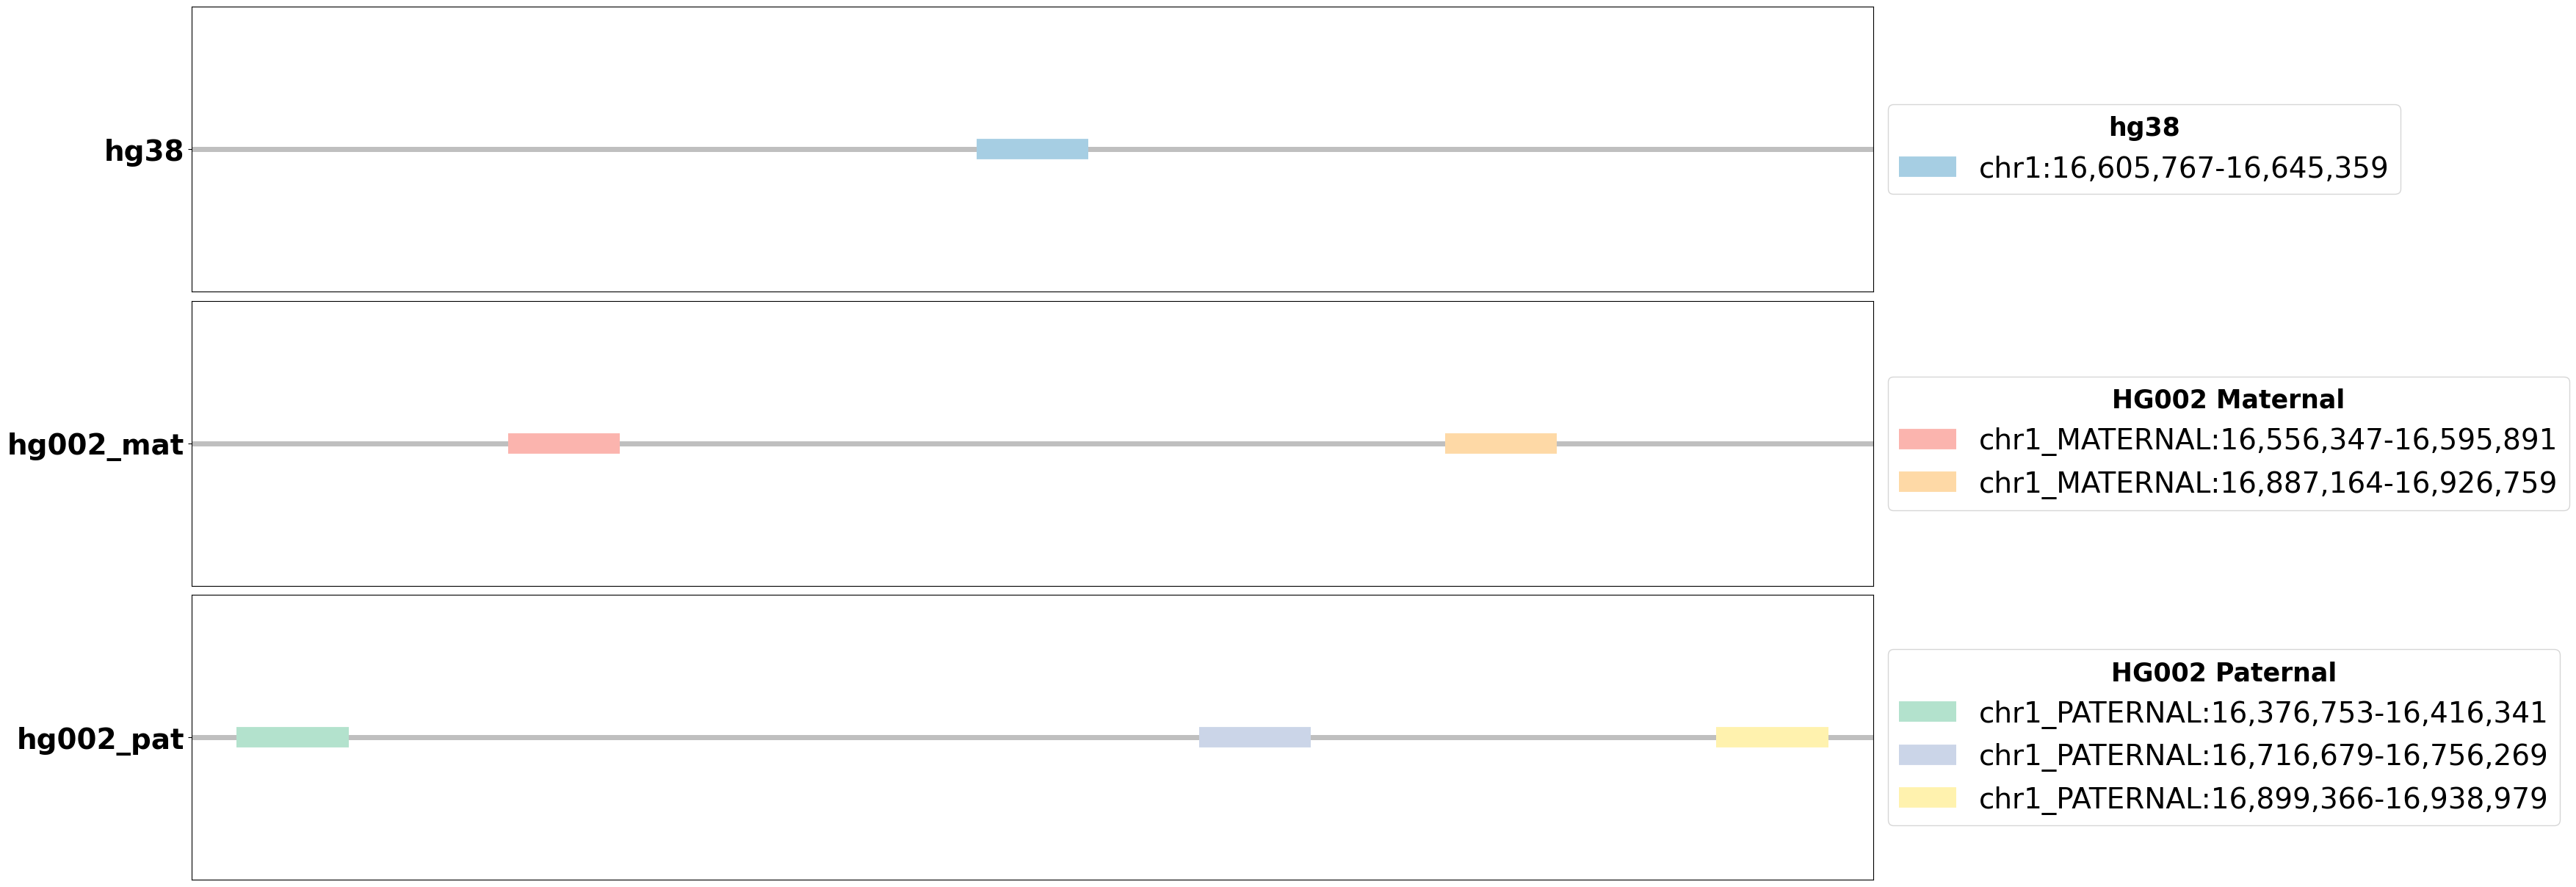

In [685]:
dup_eval.plot_alignment()

In [686]:

dup_eval.extend_interval(extension_alignment=False)

The leftest window chr1:16605768-16606768 is a real duplication, extend the interval to the left one window at a time
leftest interval: chr1:16605768-16606768,1, 6
new leftest interval: chr1:16604768-16605768, 1, 6
new leftest interval: chr1:16603768-16604768, 1, 6
new leftest interval: chr1:16602768-16603768, 1, 6
new leftest interval: chr1:16601768-16602768, 1, 6
new leftest interval: chr1:16600768-16601768, 2, 6
new leftest interval: chr1:16599768-16600768, 1, 6
new leftest interval: chr1:16598768-16599768, 1, 6
new leftest interval: chr1:16597768-16598768, 1, 6
new leftest interval: chr1:16596768-16597768, 2, 6
new leftest interval: chr1:16595768-16596768, 2, 6
new leftest interval: chr1:16594768-16595768, 2, 6
new leftest interval: chr1:16593768-16594768, 2, 6
new leftest interval: chr1:16592768-16593768, 1, 6
new leftest interval: chr1:16591768-16592768, 2, 6
new leftest interval: chr1:16590768-16591768, 3, 6
The rightest window chr1:16643768-16644768 is a real duplication, exten

In [652]:
# Extend dup interval using the binning alignment method
extended_dup_interval = "chr1:16601768-16646768"
extended_dup_eval = duplication_evaluation.eval_dup_interval(extended_dup_interval, ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t)

In [653]:
extended_dup_eval.classifyInterval()

input dup interval: chr1:16601768-16646768
hg38 dup count: 1
interval: chr1:16601767-16646768	strand: 1
hg2 dup count: 5
interval: chr1_MATERNAL:16885755-16930759	strand: -1
interval: chr1_MATERNAL:16552350-16597300	strand: 1
interval: chr1_PATERNAL:16372757-16417750	strand: 1
interval: chr1_PATERNAL:16897950-16942979	strand: -1
interval: chr1_PATERNAL:16715270-16760265	strand: -1


'Homozygous Duplication'

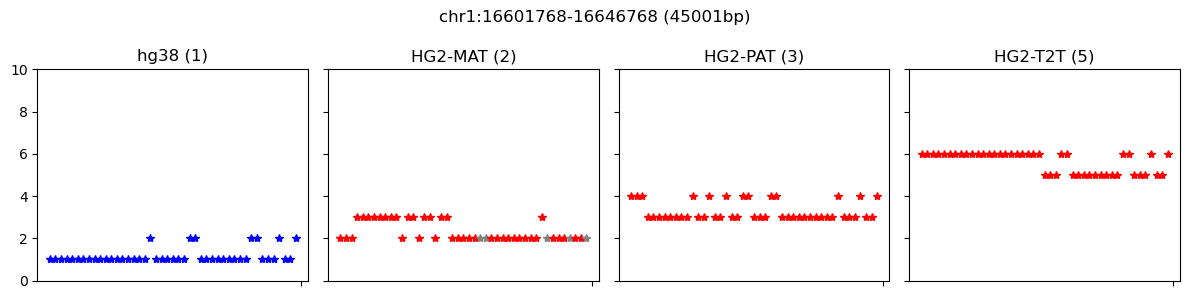

In [654]:
extended_dup_eval.plot_bin_alignment(save=True)

In [655]:
# Import libraries for testing purposes
import T2T_ACE.alignment_utilities as au 
import T2T_ACE.validator as v
import T2T_ACE.alignment_visualization_utilities as avu
import T2T_ACE.genomic_queries as gq
import T2T_ACE.interval_parsing as ip
import numpy as np

In [656]:
# Try the new method to extend the interval
ip.interval_size(dup_interval)

39592

In [702]:
chr,pos,end = ip.parse_interval(dup_interval)
print(dup_interval, ip.interval_size(dup_interval))
# Extend the interval to the left and right by half of the interval size
extension_size = int(np.round(ip.interval_size(dup_interval)/2,0))
# May be the extension size is too small, so I will extend it by the interval size
#extension_size = ip.interval_size(dup_interval)
extended_pos = pos - extension_size
extended_end = end + extension_size
extended_left_interval = ip.create_interval(chr, extended_pos, end)
extended_right_interval = ip.create_interval(chr, pos, extended_end)
print("extended left interval", extended_left_interval, ip.interval_size(extended_left_interval))
print("extended right interval", extended_right_interval, ip.interval_size(extended_right_interval))

chr1:16605768-16645359 39592
extended left interval chr1:16585972-16645359 59388
extended right interval chr1:16605768-16665155 59388


In [689]:
v.align_interval(extended_left_interval, ReferenceLocations.hg38, hg38, hg002t2t)

([['chr1:16585971-16645359', 1, 0, 59388]],
 [['chr1_MATERNAL:16887164-16946552', -1, 0, 59388],
  ['chr1_PATERNAL:16899366-16958786', -1, 0, 59388],
  ['chr1_MATERNAL:16536546-16595891', 1, 0, 59388],
  ['chr1_PATERNAL:16356975-16416341', 1, 0, 59388],
  ['chr1_PATERNAL:16716679-16776088', -1, 0, 59388]])

In [696]:
[q_en for interval,strand, q_st, q_en in v.align_interval(extended_right_interval, ReferenceLocations.hg38, hg38, hg002t2t)[1]]
        

[59388, 59388, 59388, 59388, 59388]

In [731]:
chr, pos, end = ip.parse_interval(extended_right_interval)
window_size = int(np.round(ip.interval_size(extended_right_interval) * 0.1, 0))
print("window size", window_size)

q_end_list = [q_en for interval,strand, q_st, q_en in v.align_interval(extended_right_interval, ReferenceLocations.hg38, hg38, hg002t2t)[1]]
new_interval = extended_right_interval
while min(q_end_list) <= ip.interval_size(new_interval):
    new_end = end + window_size
    new_interval = ip.create_interval(chr, pos, new_end)
    new_alignments = v.align_interval(new_interval, ReferenceLocations.hg38, hg38, hg002t2t)
    
    q_end_list = sorted([q_en for interval, strand, q_st, q_en in new_alignments[1]])
    q_end_count = [[q_end, q_end_list.count(q_end)] for q_end in set(q_end_list)]
    
    if len(q_end_list)==0:
        break
    else:
        print("new interval", new_interval, ip.interval_size(new_interval))
        print(q_end_count)
        print(min(q_end_list))
        print("")
    
    # Update end for the next iteration
    end = new_end

window size 5939
new interval chr1:16605768-16671094 65327
[[65327, 5]]
65327
new interval chr1:16605768-16677033 71266
[[70651, 5]]
70651
new interval chr1:16605768-16682972 77205
[[74896, 1], [74661, 4]]
74661


In [733]:
# What if I don't extend the interval first
chr, pos, end = ip.parse_interval(dup_interval)
window_size = int(np.round(ip.interval_size(dup_interval) * 0.1, 0))
print("window size", window_size)

q_end_list = [q_en for interval,strand, q_st, q_en in v.align_interval(dup_interval, ReferenceLocations.hg38, hg38, hg002t2t)[1]]
new_interval = dup_interval
while min(q_end_list) <= ip.interval_size(new_interval):
    new_end = end + window_size
    new_interval = ip.create_interval(chr, pos, new_end)
    new_alignments = v.align_interval(new_interval, ReferenceLocations.hg38, hg38, hg002t2t)
    
    q_end_list = sorted([q_en for interval, strand, q_st, q_en in new_alignments[1]])
    q_end_count = [[q_end, q_end_list.count(q_end)] for q_end in set(q_end_list)]
    
    if len(q_end_list)==0:
        break
    else:
        print("new interval", new_interval, ip.interval_size(new_interval))
        print(q_end_count)
        min_q_end_percentage = min(q_end_list)/ip.interval_size(new_interval)
        print(min(q_end_list), min_q_end_percentage*100, "%")
        print("")
    
    # Update end for the next iteration
    end = new_end

window size 3959
new interval chr1:16605768-16649318 43551
[[43551, 5]]
43551 100.0 %

new interval chr1:16605768-16653277 47510
[[47510, 5]]
47510 100.0 %
new interval chr1:16605768-16657236 51469
[[51469, 5]]
51469 100.0 %

new interval chr1:16605768-16661195 55428
[[55120, 1], [55428, 4]]
55120 99.4443241682904 %
new interval chr1:16605768-16665154 59387
[[59387, 5]]
59387 100.0 %
new interval chr1:16605768-16669113 63346
[[63346, 5]]
63346 100.0 %
new interval chr1:16605768-16673072 67305
[[67305, 5]]
67305 100.0 %
new interval chr1:16605768-16677031 71264
[[70651, 5]]
70651 99.13981814099687 %
new interval chr1:16605768-16680990 75223
[[74896, 1], [74661, 4]]
74661 99.25288807944379 %


In [778]:
def extend_2_right(dup_interval):
    chr, pos, end = ip.parse_interval(dup_interval)
    window_size = int(np.round(ip.interval_size(dup_interval) * 0.1, 0))
    print("window size", window_size)

    q_end_list = [q_en for interval,strand, q_st, q_en in v.align_interval(dup_interval, ReferenceLocations.hg38, hg38, hg002t2t)[1]]
    new_interval = dup_interval
    copies_alignment_end = ""
    while min(q_end_list) <= ip.interval_size(new_interval):
        new_end = end + window_size
        new_interval = ip.create_interval(chr, pos, new_end)
        new_alignments = v.align_interval(new_interval, ReferenceLocations.hg38, hg38, hg002t2t)
        
        q_end_list = sorted([q_en for interval, strand, q_st, q_en in new_alignments[1]])
        q_end_count = [[q_end, q_end_list.count(q_end)] for q_end in sorted(set(q_end_list))]
        
        if q_end_count[-1][1]==2:
            print("new interval", new_interval, ip.interval_size(new_interval))
            print(q_end_count)
            print(f"extend interval by {q_end_count[0][0]-ip.interval_size(dup_interval)}")
            copies_alignment_end = pos+q_end_count[0][0]
            break
        else:
            print("new interval", new_interval, ip.interval_size(new_interval))
            print(q_end_count)
            min_q_end_percentage = min(q_end_list)/ip.interval_size(new_interval)
            print(min(q_end_list), min_q_end_percentage*100, "%")
            print("")
        
        # Update end for the next iteration
        end = new_end
    extended_2_right_interval = ip.create_interval(chr, pos, copies_alignment_end)
    return extended_2_right_interval

In [779]:
extend_2_right("chr1:16715826-16727637")

window size 1181
new interval chr1:16715826-16728818 12993
[[12993, 5]]
12993 100.0 %

new interval chr1:16715826-16729999 14174
[[14174, 5]]
14174 100.0 %

new interval chr1:16715826-16731180 15355
[[15355, 5]]
15355 100.0 %

new interval chr1:16715826-16732361 16536
[[16536, 5]]
16536 100.0 %
new interval chr1:16715826-16733542 17717
[[17682, 1], [17702, 1], [17716, 2], [17717, 1]]
17682 99.80244962465429 %

new interval chr1:16715826-16734723 18898
[[18898, 5]]
18898 100.0 %

new interval chr1:16715826-16735904 20079
[[20079, 5]]
20079 100.0 %

new interval chr1:16715826-16737085 21260
[[20256, 2], [21260, 3]]
20256 95.27751646284102 %
new interval chr1:16715826-16738266 22441
[[22084, 1], [22441, 4]]
22084 98.40916180205873 %

new interval chr1:16715826-16739447 23622
[[23622, 4]]
23622 100.0 %

new interval chr1:16715826-16740628 24803
[[24803, 4]]
24803 100.0 %
new interval chr1:16715826-16741809 25984
[[25984, 4]]
25984 100.0 %

new interval chr1:16715826-16742990 27165
[[27165,

'chr1:16715826-16745162'

In [770]:
v.align_interval("chr1:16715826-16745162", ReferenceLocations.hg38, hg38, hg002t2t)[0]

[['chr1:16715825-16745162', 1, 0, 29337]]

In [772]:
v.align_interval("chr1:16715826-16745162", ReferenceLocations.hg38, hg38, hg002t2t)[1]

[['chr1_PATERNAL:16854882-16884193', 1, 0, 29336],
 ['chr1_MATERNAL:16429819-16459161', -1, 0, 29336],
 ['chr1_PATERNAL:16521372-16558022', -1, 0, 29337],
 ['chr1_MATERNAL:16699187-16728525', -1, 0, 29336]]

In [751]:
v.align_interval("chr1:16715826-16746533", ReferenceLocations.hg38, hg38, hg002t2t)

([['chr1:16715825-16746533', 1, 0, 30708]],
 [['chr1_PATERNAL:16520012-16558022', -1, 0, 30708],
  ['chr1_PATERNAL:16854882-16884193', 1, 0, 29336],
  ['chr1_MATERNAL:16429819-16459161', -1, 0, 29336],
  ['chr1_MATERNAL:16699187-16728525', -1, 0, 29336],
  ['chr1_PATERNAL:16232936-16284438', -1, 0, 30708]])

In [780]:
extend_2_right("chr1:16879014-16949283")

window size 7027
new interval chr1:16879014-16956310 77297
[[75349, 2], [77297, 2]]
extend interval by 5079


'chr1:16879014-16954363'

In [781]:
v.align_interval('chr1:16879014-16954363', ReferenceLocations.hg38, hg38, hg002t2t)

([['chr1:16879013-16954363', 1, 0, 75350]],
 [['chr1_MATERNAL:17005142-17080508', 1, 0, 75350],
  ['chr1_PATERNAL:17036199-17111560', 1, 0, 75350],
  ['chr1_MATERNAL:16276648-16351484', -1, 0, 75349],
  ['chr1_PATERNAL:16181035-16255892', -1, 0, 75349]])

In [784]:
v.align_interval('chr1:248407553-248446847', ReferenceLocations.hg38, hg38, hg002t2t)

([['chr1:248407552-248446847', 1, 0, 39295]],
 [['chr1_MATERNAL:243436179-243475688', 1, 0, 39295],
  ['chr1_PATERNAL:251526142-251565663', 1, 0, 39295],
  ['chr1_MATERNAL:243667686-243705745', -1, 1160, 39295]])

In [790]:
v.align_interval(f'chr1:{1160+248407553}-248446847', ReferenceLocations.hg38, hg38, hg002t2t)

([['chr1:248408712-248446847', 1, 0, 38135]],
 [['chr1_MATERNAL:243437551-243475688', 1, 0, 38135],
  ['chr1_PATERNAL:251527514-251565663', 1, 0, 38135],
  ['chr1_MATERNAL:243667686-243705745', -1, 0, 38135]])

In [ ]:
# TODO: I need a function to check the start and end of the alignment and determine whether i need to extend or shrink the interval

# If the copy alignment start is not 0, then I need to move the interval start pos to the right
# If the copy alignment start is 0, then I will try to extend the interval to the left
# If the copy alignment end is smaller than the interval size, then I need to move the interval end to the left
# If the copy alignment end is equal to the interval size, then I will try to extend the interval to the right

In [792]:
v.align_interval('chr2:74330292-74331319', ReferenceLocations.hg38, hg38, hg002t2t)

([['chr2:74330291-74331319', 1, 0, 1028]],
 [['chr2_PATERNAL:74361477-74362568', 1, 0, 1028],
  ['chr2_MATERNAL:74346865-74347956', 1, 0, 1028],
  ['chr2_PATERNAL:74362568-74363658', 1, 1, 1028]])

In [793]:
extend_2_right('chr2:74330292-74331319')

window size 103
new interval chr2:74330292-74331422 1131
[[1120, 1], [1131, 2]]
extend interval by 92


'chr2:74330292-74331412'

In [796]:
v.align_interval('chr2:89673674-89790690', ReferenceLocations.hg38, hg38, hg002t2t)

([], [])

In [797]:
v.align_interval('chr2:89795582-89851643', ReferenceLocations.hg38, hg38, hg002t2t)

([['chr2:89795581-89851643', 1, 0, 56062]],
 [['chr2_MATERNAL:90016247-90073488', 1, 0, 56062],
  ['chr2_PATERNAL:89941620-89998824', 1, 0, 56062],
  ['chr2_PATERNAL:88965829-89020444', -1, 0, 56062],
  ['chr2_MATERNAL:89046296-89104490', -1, 0, 56062]])

In [798]:
extend_2_right('chr2:89795582-89851643')

window size 5606
new interval chr2:89795582-89857249 61668
[[61668, 4]]
61668 100.0 %
new interval chr2:89795582-89862855 67274
[[67274, 4]]
67274 100.0 %
new interval chr2:89795582-89868461 72880
[[72880, 4]]
72880 100.0 %
new interval chr2:89795582-89874067 78486
[[78486, 4]]
78486 100.0 %
new interval chr2:89795582-89879673 84092
[[84092, 4]]
84092 100.0 %
new interval chr2:89795582-89885279 89698
[[89698, 4]]
89698 100.0 %
new interval chr2:89795582-89890885 95304
[[95304, 4]]
95304 100.0 %
new interval chr2:89795582-89896491 100910
[[100910, 4]]
100910 100.0 %
new interval chr2:89795582-89902097 106516
[[106516, 4]]
106516 100.0 %
new interval chr2:89795582-89907703 112122
[[112122, 4]]
112122 100.0 %
new interval chr2:89795582-89913309 117728
[[117728, 4]]
117728 100.0 %
new interval chr2:89795582-89918915 123334
[[123334, 4]]
123334 100.0 %
new interval chr2:89795582-89924521 128940
[[128940, 4]]
128940 100.0 %
new interval chr2:89795582-89930127 134546
[[134546, 4]]
134546 100.

'chr2:89795582-90039480'

In [799]:
v.align_interval('chr2:122526667-122536995', ReferenceLocations.hg38, hg38, hg002t2t)

([['chr2:122526666-122536995', 1, 0, 10329]],
 [['chr2_MATERNAL:122390591-122400916', 1, 0, 10329],
  ['chr2_MATERNAL:122400916-122411240', 1, 1, 10329],
  ['chr2_PATERNAL:122165344-122175668', 1, 0, 10329]])

In [800]:
extend_2_right('chr2:122526667-122536995')

window size 1033
new interval chr2:122526667-122538028 11362
[[11362, 2]]
extend interval by 1033


'chr2:122526667-122538029'

In [787]:
v.align_interval(extend_2_right('chr1:248407553-248446847'), ReferenceLocations.hg38, hg38, hg002t2t)

window size 3930
new interval chr1:248407553-248450777 43225
[[43225, 3]]
43225 100.0 %

new interval chr1:248407553-248454707 47155
[[47155, 3]]
47155 100.0 %
new interval chr1:248407553-248458637 51085
[[51063, 1], [51085, 2]]
extend interval by 11768


([['chr1:248407552-248458616', 1, 0, 51064]],
 [['chr1_MATERNAL:243436179-243487457', 1, 0, 51064],
  ['chr1_PATERNAL:251526142-251577431', 1, 0, 51064],
  ['chr1_MATERNAL:243656207-243705745', -1, 1160, 51063]])

In [735]:
pos = 16605768
end = pos+70651
v.align_interval(ip.create_interval("chr1", pos, end), ReferenceLocations.hg38, hg38, hg002t2t)


([['chr1:16605767-16676419', 1, 0, 70652]],
 [['chr1_MATERNAL:16849074-16926759', -1, 0, 70651],
  ['chr1_MATERNAL:16556347-16633957', 1, 0, 70651],
  ['chr1_PATERNAL:16870404-16938979', -1, 0, 70651],
  ['chr1_PATERNAL:16376753-16454410', 1, 0, 70651],
  ['chr1_PATERNAL:16678601-16756269', -1, 0, 70651]])

In [726]:
# Seems like the extension size is too small, so I will continue to extend the interval
chr,pos,end = ip.parse_interval(extended_right_interval)
window_size = int(np.round(ip.interval_size(extended_right_interval)*0.1,0))
print("window size", window_size)
alignments = v.align_interval(extended_right_interval, ReferenceLocations.hg38, hg38, hg002t2t)

q_end_list = [q_en for interval,strand, q_st, q_en in alignments[1]]
q_end_count =[[q_end,q_end_list.count(q_end)] for q_end in q_end_list]

# while sorted(q_end_list)[0] <= ip.interval_size(extended_right_interval):
#         new_end = end + window_size
#         new_interval = ip.create_interval(chr, pos, new_end)
#         print("new interval", new_interval, ip.interval_size(new_interval))
#         new_alignments = v.align_interval(new_interval, ReferenceLocations.hg38, hg38, hg002t2t)
#         print([q_st for interval,strand, q_st, q_en in new_alignments[1]])
#         print([q_en for interval,strand, q_st, q_en in new_alignments[1]])
#         
#  
for i in np.arange(20):
        new_end = end + window_size*i
        new_interval = ip.create_interval(chr, pos, new_end)
        print("new interval", new_interval, ip.interval_size(new_interval))
        new_alignments = v.align_interval(new_interval, ReferenceLocations.hg38, hg38, hg002t2t)
        q_end_list = [q_en for interval,strand, q_st, q_en in new_alignments[1]]
        q_end_count =[[q_end,q_end_list.count(q_end)] for q_end in set(q_end_list)]
        print(q_end_count)
        print(sorted(q_end_list)[0])
        print("")


window size 5939
new interval chr1:16605768-16665155 59388
[[59388, 5]]
59388

new interval chr1:16605768-16671094 65327
[[65327, 5]]
65327

new interval chr1:16605768-16677033 71266
[[70651, 5]]
70651

new interval chr1:16605768-16682972 77205
[[74896, 1], [74661, 4]]
74661

new interval chr1:16605768-16688911 83144
[]


IndexError: list index out of range

In [725]:
v.align_interval("chr1:16605768-16688911", ReferenceLocations.hg38, hg38, hg002t2t)

([['chr1:16605767-16688911', 1, 0, 83144]], [])

In [691]:
v.align_interval("chr1:16585972-16665155", ReferenceLocations.hg38, hg38, hg002t2t)

([['chr1:16585971-16665155', 1, 0, 79184]],
 [['chr1_MATERNAL:16867353-16946552', -1, 0, 79184],
  ['chr1_MATERNAL:16536546-16615692', 1, 0, 79184],
  ['chr1_PATERNAL:16881359-16958786', -1, 0, 79184],
  ['chr1_PATERNAL:16356975-16436142', 1, 0, 79184],
  ['chr1_PATERNAL:16696878-16776088', -1, 0, 79184]])

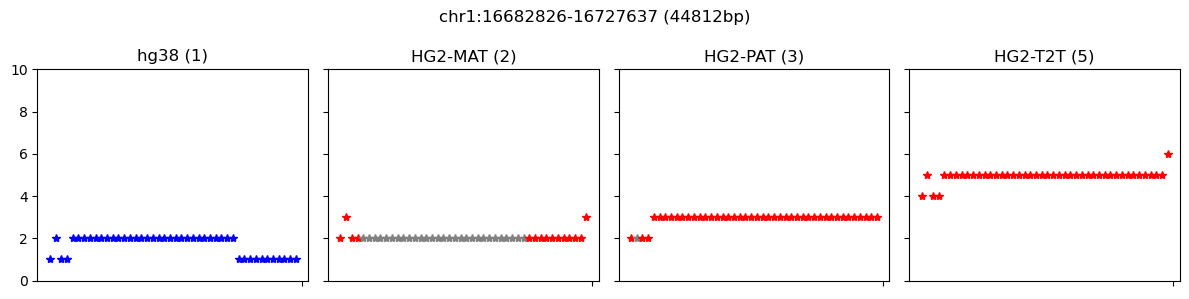

In [522]:
extended_dup_eval.plot_bin_alignment(save=True)

In [518]:
clean_dup_interval = "chr4:98892636-98895948"
clean_dup_eval = duplication_evaluation.eval_dup_interval(clean_dup_interval, ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t)
clean_dup_eval.classifyInterval()

input dup interval: chr4:98892636-98895948
hg38 dup count: 1
interval: chr4:98892635-98895948	strand: 1
hg2 dup count: 3
interval: chr4_MATERNAL:100278742-100282052	strand: 1
interval: chr4_PATERNAL:101086397-101089706	strand: 1
interval: chr4_PATERNAL:101083087-101086397	strand: 1


'Paternal Heterozygous Duplication'

In [519]:
clean_dup_eval.extend_interval()

The leftest window is a real duplication, extend the interval to the left one window at a time
new leftest interval: chr4:98892415-98892636, 1, 2
extended leftest interval: chr4:98892415-98892636, 1, 2
